In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
# -------------------------------
# 1. Load Dataset
# -------------------------------
data = pd.read_csv("bengaluru_house_prices.csv")
print(data.columns)




Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [14]:
# -------------------------------
# 2. Convert total_sqft
# -------------------------------
def convert_sqft_to_num(x):
    if isinstance(x, str):
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        try:
            return float(x)
        except:
            return np.nan
    return x

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

In [15]:
# -------------------------------
# 3. Select Correct Columns ✅
# -------------------------------
data = data[['location', 'total_sqft', 'bath','balcony','price']]
data.dropna(inplace=True)

print("Cleaned shape:", data.shape)


Cleaned shape: (12668, 5)


In [16]:
# -------------------------------
# 4. Handle Location
# -------------------------------
top_locations = data['location'].value_counts().nlargest(10).index
data['location'] = data['location'].apply(
    lambda x: x if x in top_locations else 'Other'
)

data = pd.get_dummies(data, columns=['location'], drop_first=True)





In [17]:
# -------------------------------
# 5. Split X and y
# -------------------------------
X = data.drop('price', axis=1)
y = data['price']


In [18]:
# -------------------------------
# 6. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [19]:
# -------------------------------
# 7. Scale & Train
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R2:", cv_score.mean())



CV R2: 0.3984628009955063


In [20]:
# -------------------------------
# 8. Evaluate
# -------------------------------
y_pred = model.predict(X_test_scaled)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))

print("✅ Model trained successfully")

MAE : 43.648343799731705
RMSE: 118.03927966821463
R2  : 0.3514155613077915
✅ Model trained successfully


_________________
 VISUALISATION
_________________                       

Price Distribution


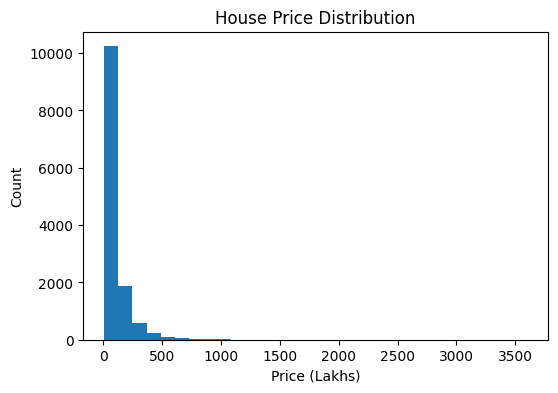

In [4]:
plt.figure(figsize=(6,4))
plt.hist(data['price'], bins=30)
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.title("House Price Distribution")
plt.show()

Price VS Total sq.ft

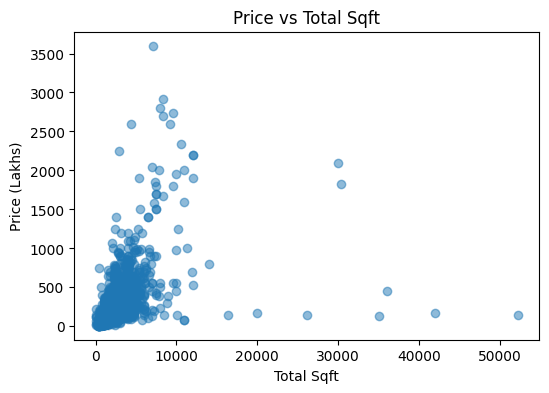

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(data['total_sqft'], data['price'], alpha=0.5)
plt.xlabel("Total Sqft")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs Total Sqft")
plt.show()

Price VS balcony

C:\Users\SERVER1\AppData\Local\Temp\ipykernel_7032\3196696824.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


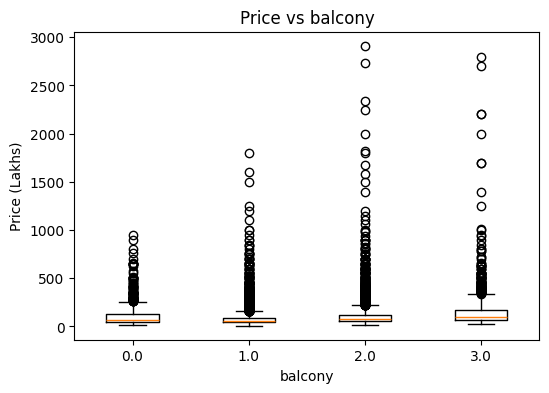

In [9]:
plt.figure(figsize=(6,4))
plt.boxplot(
    [data[data['balcony'] == i]['price'] for i in sorted(data['balcony'].unique())],
    labels=sorted(data['balcony'].unique())
)
plt.xlabel("balcony")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs balcony")
plt.show()

Actual VS prediction

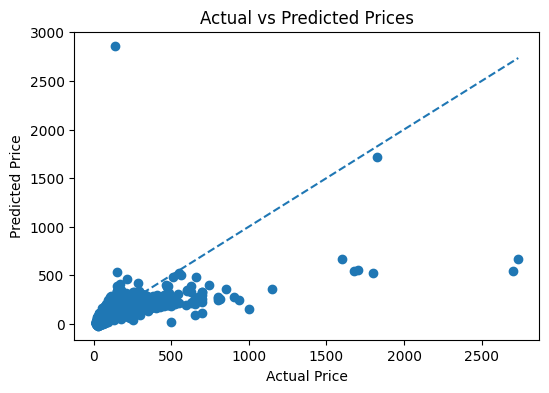

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

Bathrooms vs Price


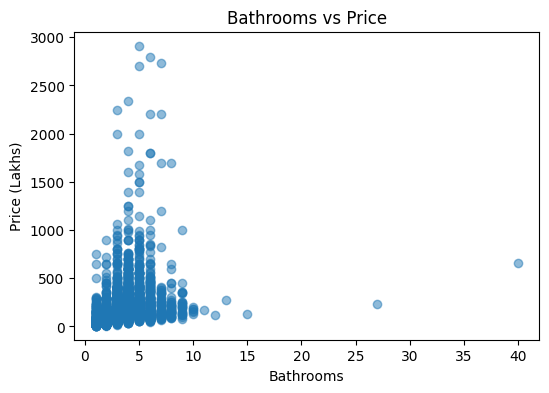

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(data['bath'], data['price'], alpha=0.5)
plt.xlabel("Bathrooms")
plt.ylabel("Price (Lakhs)")
plt.title("Bathrooms vs Price")
plt.show()

In [22]:
print("\n--- Enter House Details for Prediction ---")

user_sqft = float(input("Enter total sqft: "))
user_bath = int(input("Enter number of bathrooms: "))
user_bhk = int(input("Enter number of BHK: "))
user_location = input("Enter location: ")

# Handle unseen locations
if user_location not in top_locations:
    user_location = 'Other'

# Base input
user_data = pd.DataFrame(
    [[user_sqft, user_bath, user_bhk]],
    columns=['total_sqft', 'bath', 'bhk']
)

# Add missing location columns
X_columns = X.columns
for col in X_columns:
    if col.startswith("location_"):
        user_data[col] = 1 if col == f"location_{user_location}" else 0

# Ensure column order matches training data
user_data = user_data.reindex(columns=X_columns, fill_value=0)

# Scale input
user_data_scaled = scaler.transform(user_data)

# Predict
predicted_price = model.predict(user_data_scaled)[0]

print(f"\n🏠 Estimated House Price: ₹ {round(predicted_price, 2)} Lakhs")


--- Enter House Details for Prediction ---

🏠 Estimated House Price: ₹ 363.13 Lakhs
